In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

os.chdir(os.path.dirname("../"))

In [2]:
from utils.data_loader import load_dataset

In [3]:
data = load_dataset()

Loaded Posts.xml


In [4]:
df = data["Posts"]
df.sample(5)

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,Tags,AnswerCount,CommentCount,ClosedDate,CommunityOwnedDate,ContentLicense,ParentId,OwnerDisplayName,LastEditorDisplayName,FavoriteCount
138957,269970,1,271665.0,2015-01-13T20:11:05.437,2,270.0,<p>I have a function to show or hide a certain...,148157.0,9113.0,2015-01-14T08:54:07.290,...,|algorithms|,3.0,9,None,None,CC BY-SA 3.0,NaN,None,None,NaN
20207,47778,1,47784.0,2011-02-14T20:11:58.357,42,20576.0,"<p>First, some background on me. I have a PhD ...",8402.0,25936.0,2012-03-07T09:10:19.373,...,|interview|,9.0,13,2014-04-06T13:29:07.830,None,CC BY-SA 2.5,NaN,None,None,NaN
16114,39367,2,NaN,2011-01-24T12:03:33.137,2,NaN,<p>So there are a few things here:</p>\n\n<ul>...,5095.0,NaN,None,...,None,NaN,0,None,None,CC BY-SA 2.5,39363.0,None,None,NaN
220659,410085,2,NaN,2020-05-13T16:16:57.310,0,NaN,<p>One reason might be that every SDK you can ...,97810.0,97810.0,2020-05-13T17:00:53.843,...,None,NaN,0,None,None,CC BY-SA 4.0,25267.0,None,None,NaN
242771,448970,1,448971.0,2023-12-05T20:18:08.907,-2,169.0,<p>I am currently writing an application that ...,437649.0,437649.0,2023-12-05T20:18:36.247,...,|design-patterns|architecture|aws|lambda|,2.0,2,None,None,CC BY-SA 4.0,NaN,None,None,NaN


In [5]:
df.columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'CreationDate', 'Score',
       'ViewCount', 'Body', 'OwnerUserId', 'LastEditorUserId', 'LastEditDate',
       'LastActivityDate', 'Title', 'Tags', 'AnswerCount', 'CommentCount',
       'ClosedDate', 'CommunityOwnedDate', 'ContentLicense', 'ParentId',
       'OwnerDisplayName', 'LastEditorDisplayName', 'FavoriteCount'],
      dtype='object')

In [6]:
df.PostTypeId.value_counts()

PostTypeId
2    178628
1     63423
5       984
4       984
6        31
3        10
7         6
Name: count, dtype: int64

In [7]:
df[df.PostTypeId == 2].Body

1         <p>Ideally, code should be so well coded that ...
3         <p>I think the answer is the usual "It depends...
5         <p>IMO, I've found that the transparency offer...
6         <p>Only if the comment describes what the code...
9         <p>Stress.  I give in to temptation and surf S...
                                ...                        
244058    <p>Fundamentally, you are trying to solve an i...
244059    <p>The problem with an integration of things, ...
244062    <p>The solution is to do the rendering on the ...
244064    <p>The idea is to have multiple generic endpoi...
244065    <p>Your assumption that you always need all th...
Name: Body, Length: 178628, dtype: object

In [8]:
df[df.PostTypeId == 1].Body.sample().iloc[0]

'<p>So this is a very beginner question, so please do be patient with me: \nBut I am building a little practice project and what I am struggling to understand is the overall structure of the solution, in terms of breaking projects up. I assume this is for easily readability and maintainability and as I have never worked like that before I have a few questions. </p>\n\n<p>So for example sake, I am building a payment app where people transfer money to eachother ("pretend" money) there will be a basic front end using razor pages and an api solution that captures all info from the database and exports as json. </p>\n\n<p>So far I\'ve structured my project thusfar:</p>\n\n<p>project.Domain (this contains all the actual logic, such as the core models and controllers, and code to transfer money from one account to another etc ) </p>\n\n<p>project.Presentation(this will be where all the razor pages live, so in effect the data from Domain is passed into here and printed to the page)</p>\n\n<p>p

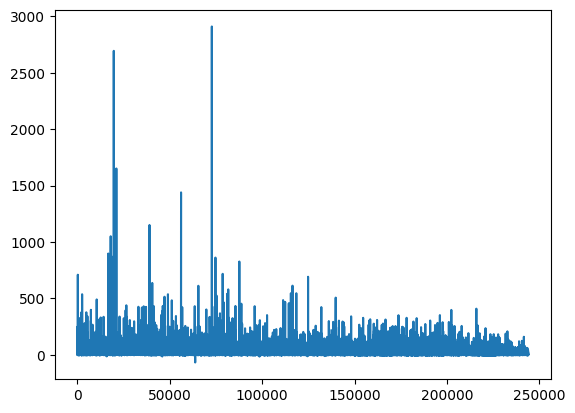

In [9]:
plt.plot(df.Score)

In [10]:
df.count().ViewCount

63423

In [11]:
df.count().Score

244066

In [12]:
df.count().Body

243622

In [13]:
df[df.Body.isna()].shape[0]

444

In [14]:
df = df[~df.Body.isna()]

In [15]:
df.columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'CreationDate', 'Score',
       'ViewCount', 'Body', 'OwnerUserId', 'LastEditorUserId', 'LastEditDate',
       'LastActivityDate', 'Title', 'Tags', 'AnswerCount', 'CommentCount',
       'ClosedDate', 'CommunityOwnedDate', 'ContentLicense', 'ParentId',
       'OwnerDisplayName', 'LastEditorDisplayName', 'FavoriteCount'],
      dtype='object')

In [16]:
df = df[["Id", "PostTypeId", "AcceptedAnswerId", "CreationDate", "Score", "ViewCount", "Body", "OwnerUserId", 
         "LastEditorUserId", "Tags", "CommentCount", "ClosedDate", "FavoriteCount"]]

In [17]:
questions = df[df.PostTypeId == 1]
answers = df[df.PostTypeId == 2]